In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('Walmart (1).csv',encoding='ISO-8859-1')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

<h1 style="font-family:Palatino;color:limegreen;"> Walmart </h1>
<h3 style="font-family:Helvetica;color:darkgreen;">Objective of the Project</h3>
<ol>
    <li> come up with useful insights that can be used by each of the stores to improve in various areas. </li>
    <li> Forecast the sales for each store for the next 12 weeks. </li>
</ol>


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
from pandas_profiling import ProfileReport
Report = ProfileReport(data)
Report.to_file(output_file='Walmart.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
data.shape

(6435, 8)

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


<h2>Data Summary</h2>
<ul>
  <li>The dataset contains 6435 entries and 8 columns:</li>
  <ul>
    <li>Store</li>
    <li>Date</li>
    <li>Weekly_Sales</li>
    <li>Holiday_Flag</li>
    <li>Temperature</li>
    <li>Fuel_Price</li>
    <li>CPI</li>
    <li>Unemployment</li>
  </ul>
  <li>The Weekly_Sales column has a mean of 1.046965e+06 and a standard deviation of 5.643666e+05. The minimum weekly sales value is 2.099862e+05, while the maximum weekly sales value is 3.818686e+06.</li>
  <li>The average temperature is 60.663782 degrees Fahrenheit.</li>
  <li>The average fuel price is 3.358607 dollars per gallon.</li>
  <li>The average CPI (Consumer Price Index) is 171.578394.</li>
  <li>The average unemployment rate is 7.999151%.</li>
</ul>

In [8]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [9]:
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data.Date.dtype

dtype('<M8[ns]')

In [11]:
data['Day'] = data['Date'].dt.weekday
data['Month'] = data['Date'].dt.month
data['Year']  = data['Date'].dt.year
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [12]:
data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
Day                7
Month             12
Year               3
dtype: int64

In [13]:
data.Holiday_Flag.unique()

array([0, 1], dtype=int64)

In [14]:
data.Year.unique()

array([2010, 2011, 2012], dtype=int64)

* There are Only 2 values in Holiday That means it conatin a holiday or not
* The dataset contains data for the years 2010, `2010,2011` and `2012`

<h3 style="font-family:Helvetica;color:darkgreen;">Visualization</h3>

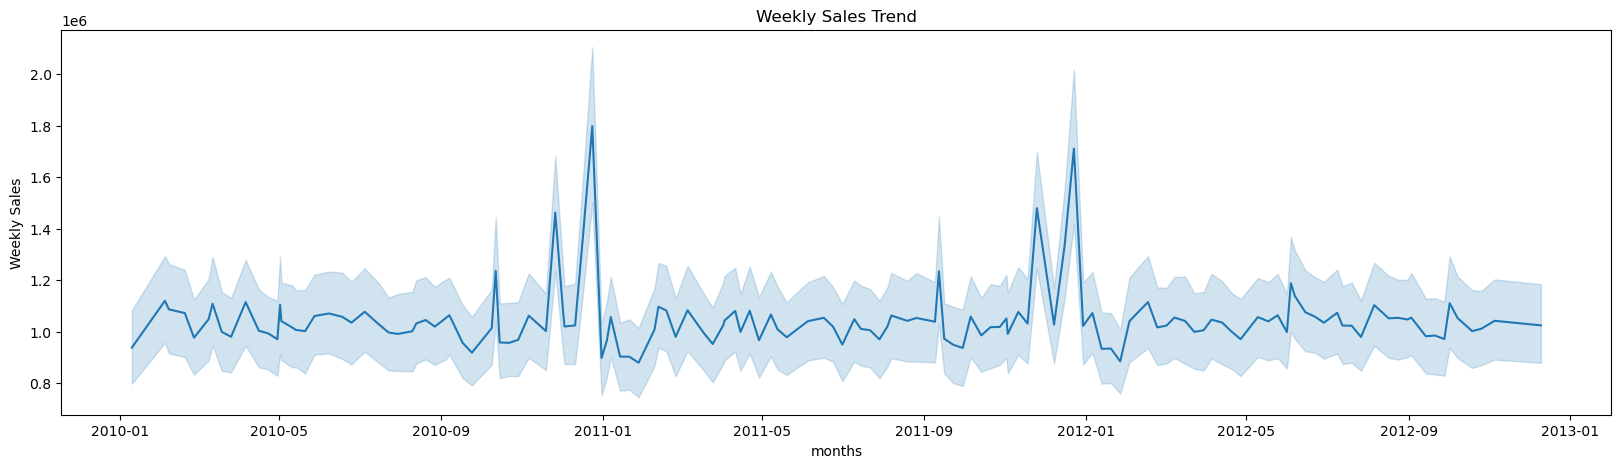

In [15]:
# plot the line chart of the weekly_sales
plt.figure(figsize=(20,5))
sns.lineplot(x=data.Date, y=data.Weekly_Sales)
plt.xlabel('months')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Trend')

plt.show()

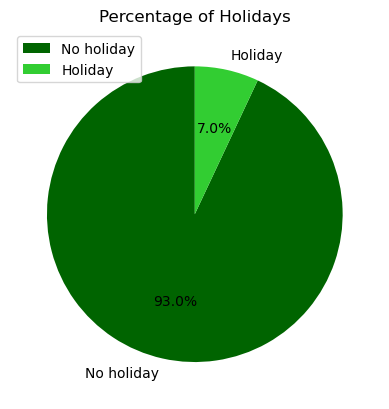

In [16]:
labels = ['No holiday', 'Holiday']
plt.pie(data.Holiday_Flag.value_counts(), labels=labels, colors=['darkgreen','limegreen'],
        autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Holidays')
plt.legend()
plt.show()

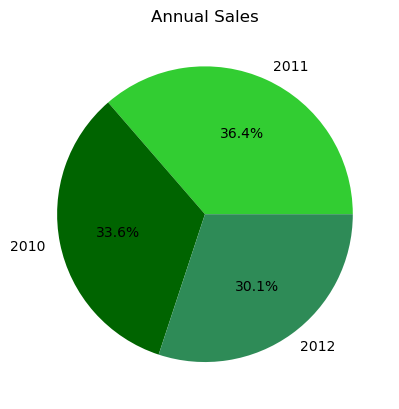

In [17]:
plt.pie(data['Year'].value_counts().values,labels =data['Year'].value_counts().index,
       autopct='%1.1f%%',colors=['limegreen', 'darkgreen', 'seagreen'])
plt.title('Annual Sales')
plt.show()

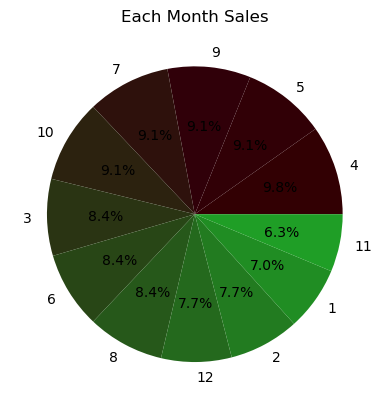

In [18]:
colors = ['#320003', '#310006', '#300009', '#2e110c', '#2c220f', '#2a3413', '#284616', '#26581a', 
          '#24691d', '#227b20', '#208d23', '#1f9e26']
plt.pie(data['Month'].value_counts().values, labels=data['Month'].value_counts().index,
        autopct='%1.1f%%', colors=colors)
plt.title('Each Month Sales')
plt.show()

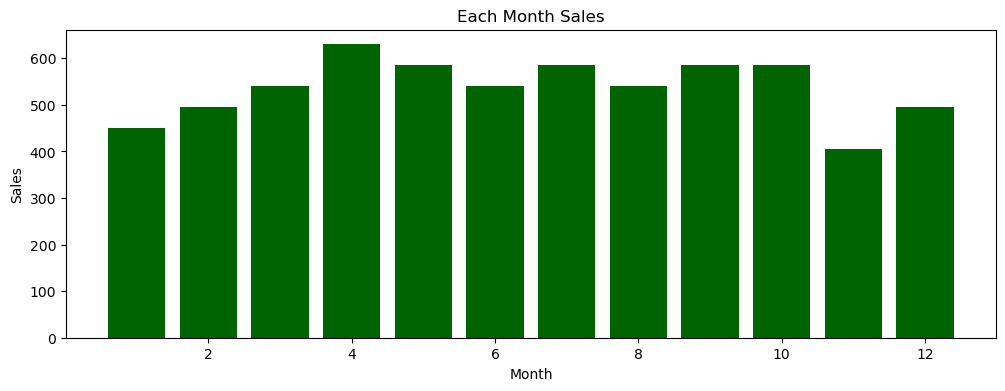

In [19]:
monthly_sales = data['Month'].value_counts()
plt.figure(figsize=(12, 4))
plt.bar(x=monthly_sales.index, height=monthly_sales.values,color= 'darkgreen')
plt.title('Each Month Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

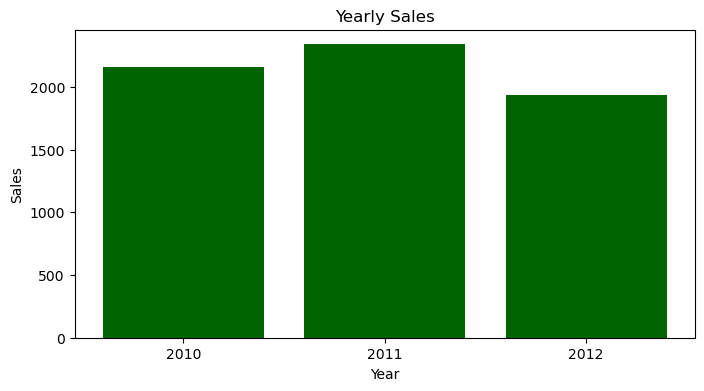

In [20]:
yearly_sales = data['Year'].value_counts()
plt.figure(figsize=(8, 4))
plt.bar(x=yearly_sales.index, height=yearly_sales.values, color='darkgreen')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks([2010, 2011, 2012])
plt.show()

<AxesSubplot:>

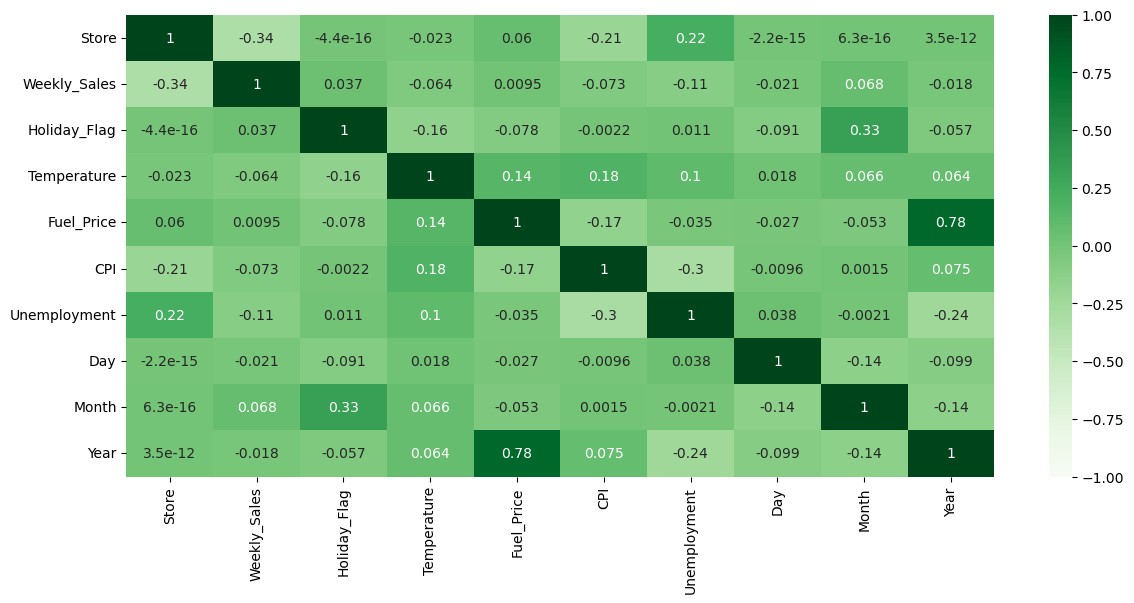

In [21]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(), annot=True, cmap='Greens', vmin=-1,vmax=1)

* There is a positive correlation between weekly sales and temperature. This means that as the temperature increases, weekly sales also tend to increase.
* There is a negative correlation between weekly sales and fuel price. This means that as the fuel price increases, weekly sales tend to decrease.
* There is no significant correlation between weekly sales and holiday flag. This means that whether or not a holiday is being celebrated does not have a significant impact on weekly sales.


In [22]:
data1 = data.copy()

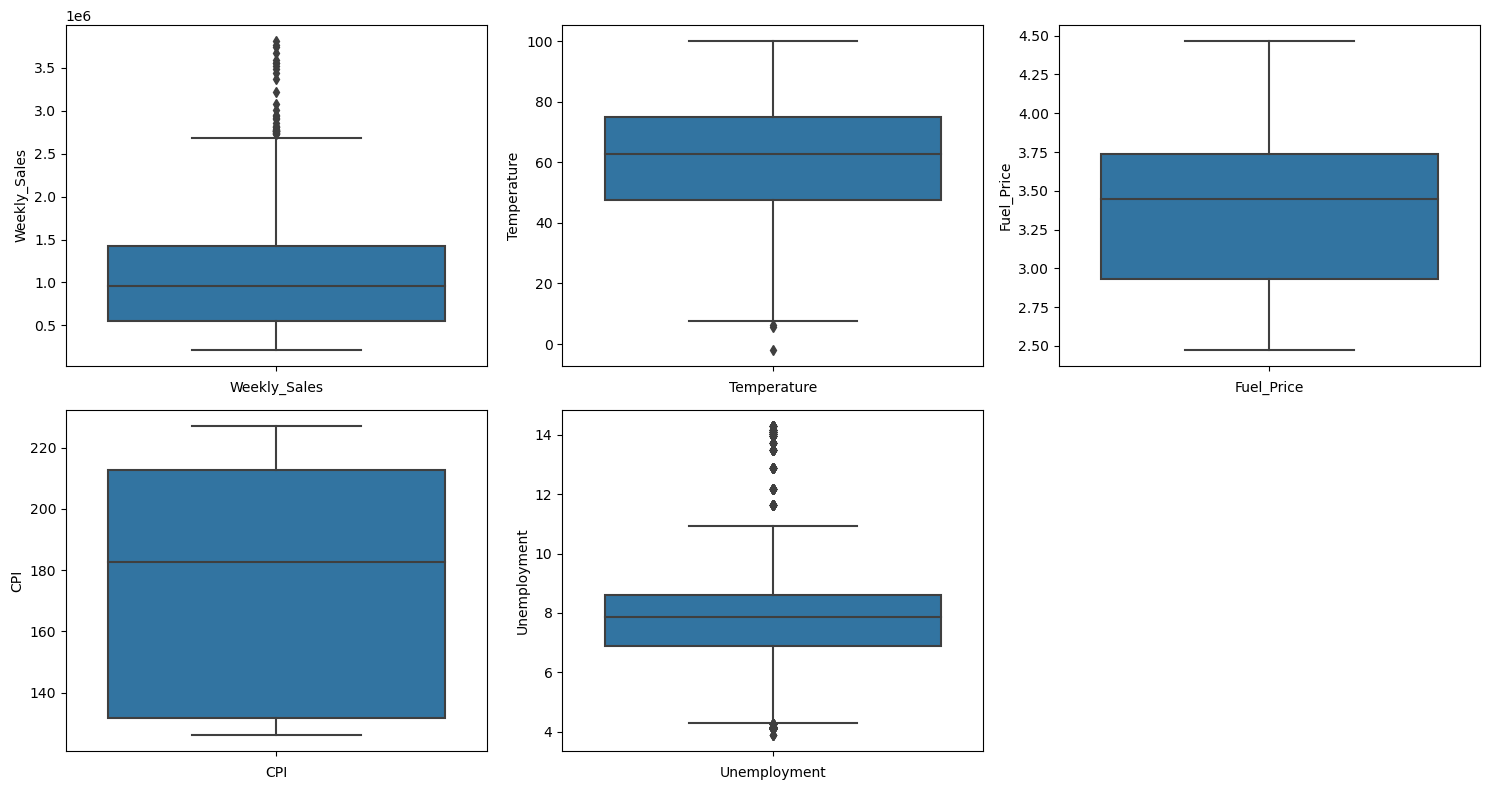

In [23]:
n=1
cols =data[["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]]
plt.figure( figsize=(15, 8))
for col in cols:
    plt.subplot(2, 3, n)
    if n<=5:
        sns.boxplot(y=data[col])
        plt.xlabel(col)
        n+=1
plt.tight_layout()
plt.show()


In [24]:
outlayers = data[["Weekly_Sales","Temperature","Unemployment"]]
def outlier_removal(l):
    for i in l:
        Q1  = data[i].quantile(0.25)
        Q3  = data[i].quantile(0.75)
        IQR = Q3-Q1
        Uper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        data[i]  = np.where(data[i]>Uper,Uper,(np.where(data[i]<lower,lower,data[i])))
outlier_removal(outlayers)

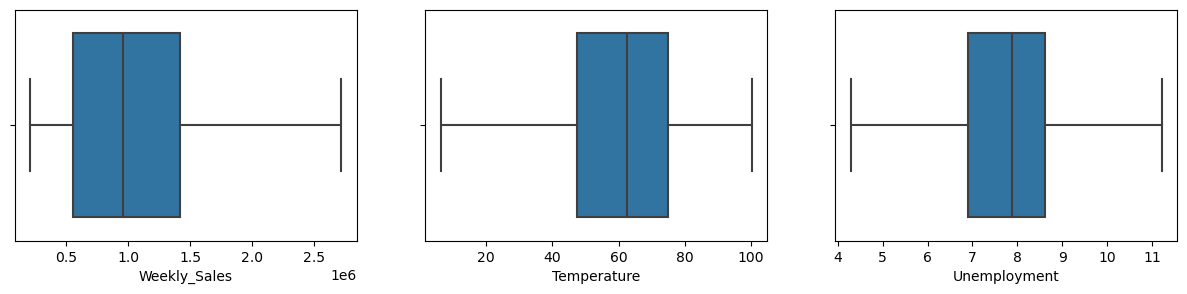

In [25]:
n = 1
cols =data[["Weekly_Sales","Temperature","Unemployment"]]
plt.figure(figsize=(15,3))
for i in cols:
        if n<=3:
            plt.subplot(1,3,n);
            n+=1
            sns.boxplot(x = data[i])
            plt.xlabel(i)

<h1 style="font-family:Palatino;color:darkgreen;"> ARIMA Model  </h1>

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [28]:
df = data1[['Date','Weekly_Sales']]

When working with time series data, it is important to have consistent data frequencies for accurate forecasting and analysis. However, the weekly data in this case has missing data points. To address this, I will convert the weekly data to monthly data and then predict the next 3 months, which is a total of 12 weeks.

In [29]:
df_grouped = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_grouped.set_index('Date', inplace=True)
df_grouped = df_grouped.resample('M').sum()
df_grouped = df_grouped.rename(columns={'Weekly_Sales': 'Monthly_Sales'})
df_grouped.head(10)

,Monthly_Sales
Date,
2010-01-31,4.223988e+07
2010-02-28,1.915869e+08
2010-03-31,1.862262e+08
2010-04-30,1.838118e+08
2010-05-31,2.806119e+08
2010-06-30,1.424361e+08
2010-07-31,1.842664e+08
2010-08-31,1.845381e+08
2010-09-30,1.797041e+08


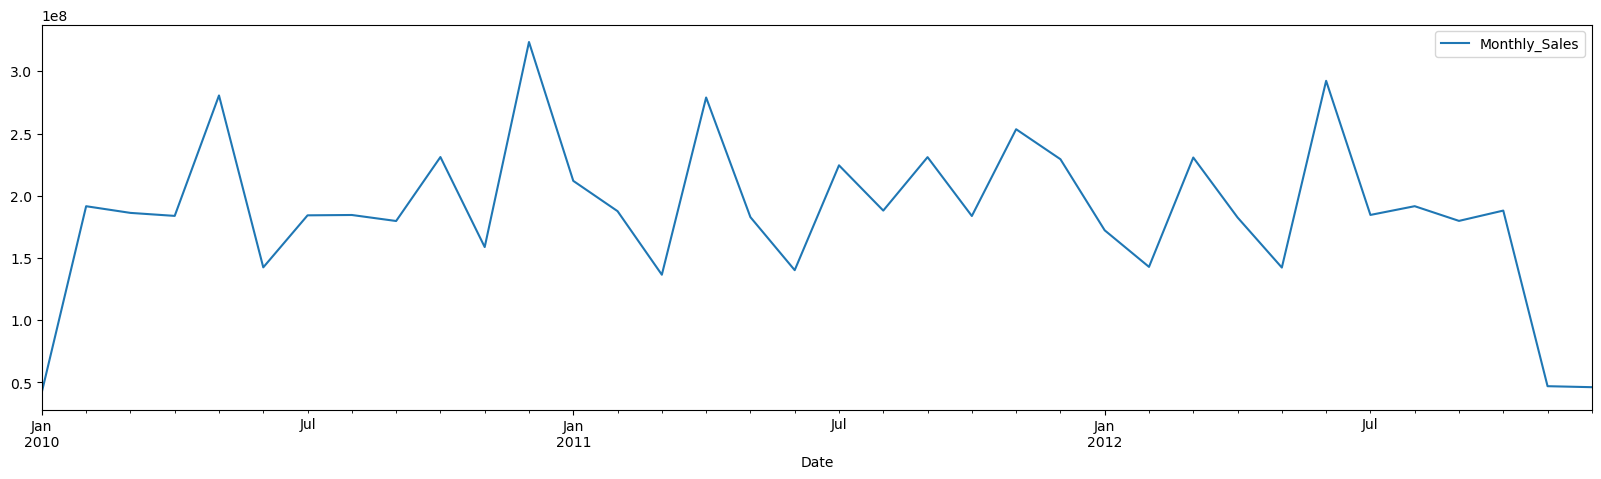

In [31]:
df_grouped.plot(figsize=(20,5))
plt.show()

<p> Seems like this data is already stationary. We can check this using the Augmented Dickey-Fuller test.</p>

<h4> Rolling </h4>

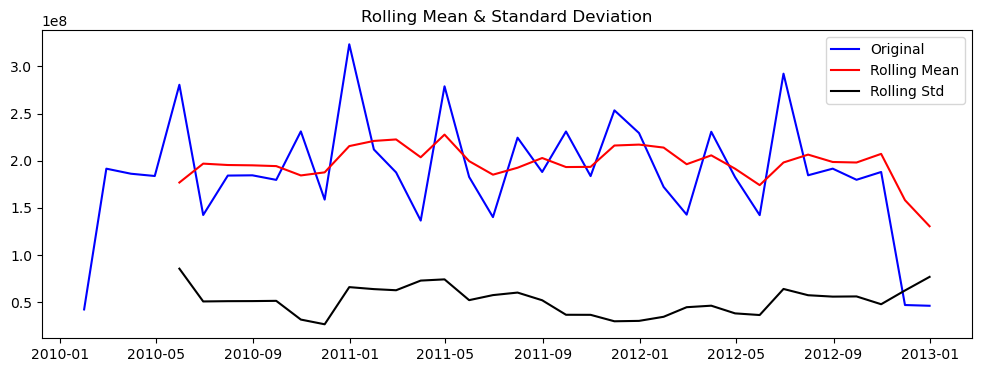

Results of Dickey-Fuller Test:
Test Statistic                -5.724245e+00
p-value                        6.829321e-07
#Lags Used                     0.000000e+00
Number of Observations Used    3.500000e+01
Critical Value (1%)           -3.632743e+00
Critical Value (5%)           -2.948510e+00
Critical Value (10%)          -2.613017e+00
dtype: float64


In [32]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5,center=False).mean() 
    rolstd = timeseries.rolling(window=5,center=False).std()
    #Plot rolling statistics:
    plt.figure(figsize=(12,4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(df_grouped)

<p> The Dickey-Fuller Test is a statistical test used to determine if a time series is stationary. The test result shows that the test statistic is -5.724245e+00 and the p-value is  6.829321e-07, which is less than the significance level of 0.05. This suggests strong evidence against the null hypothesis, indicating that the time series is stationary.<br>
here do not need to take the logarithm of the data since it is already stationary. </p>

#### Identify The ACF and PACF For The Data

In [33]:
from statsmodels.graphics.tsaplots import acf, pacf
lag_acf = acf(df_grouped, nlags=10)
lag_pacf = pacf(df_grouped, nlags=10, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

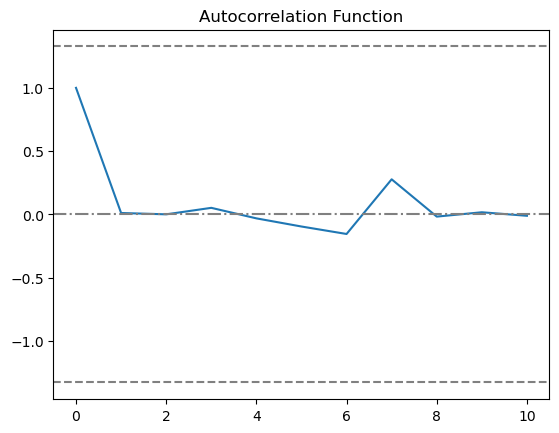

In [34]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='-.',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(df_grouped)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(df_grouped)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

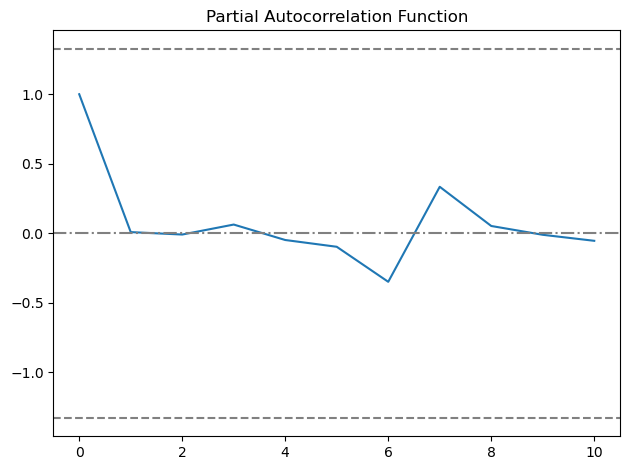

In [35]:
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='-.',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(df_grouped)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(df_grouped)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

based on this best compination of pdq is 1,1,1 but we can check train test and pdq compinations

In [36]:
len(df_grouped)

36

In [38]:
train = df_grouped[:18]['Monthly_Sales']
test = df_grouped[18:]['Monthly_Sales']

In [41]:
## How to find the ideal values for p,d,q:

import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination)) #total combinations of p,d,q

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        #model = ARIMA(train, order=pdq).fit()
        model = ARIMA(df_grouped,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)
        
        
results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])
results.sort_values("RMSE") #Least RMSE score are best hyperparamterer for (p,d,q) values

128


,RMSE
"(7, 0, 7)",3.953394e+07
"(7, 0, 6)",4.019635e+07
"(7, 0, 5)",4.141534e+07
"(5, 1, 6)",4.551757e+07
"(4, 1, 3)",5.068212e+07
...,...
"(0, 1, 0)",7.473691e+07
"(7, 1, 6)",8.245039e+07
"(7, 1, 3)",8.256686e+07
"(3, 1, 7)",8.584061e+07


Text(0.5, 1.0, 'RSS: 108957425916596592.0000')

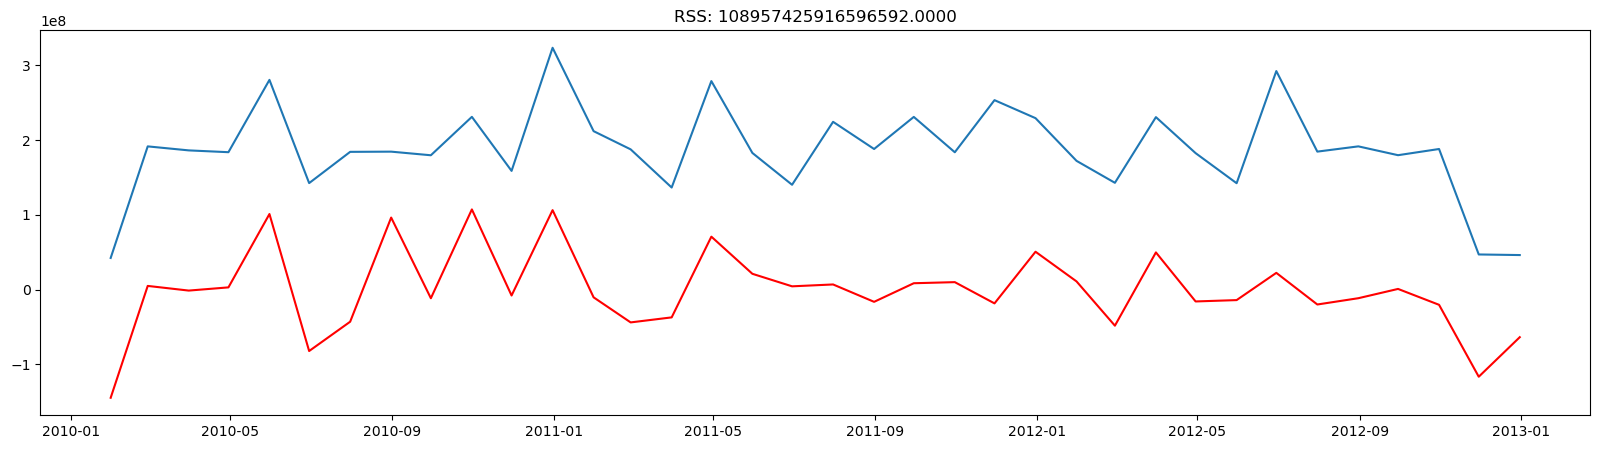

In [42]:
model = ARIMA(df_grouped, order=(7, 0, 7))
model = model.fit()

residuals = model.resid
plt.figure(figsize=(20,5))
plt.plot(df_grouped)
plt.plot(residuals, color='red')
plt.title('RSS: %.4f'% sum((residuals)**2))

<h1 style="font-family:Palatino;color:darkgreen;"> Future Predictions using Arima model  </h1>

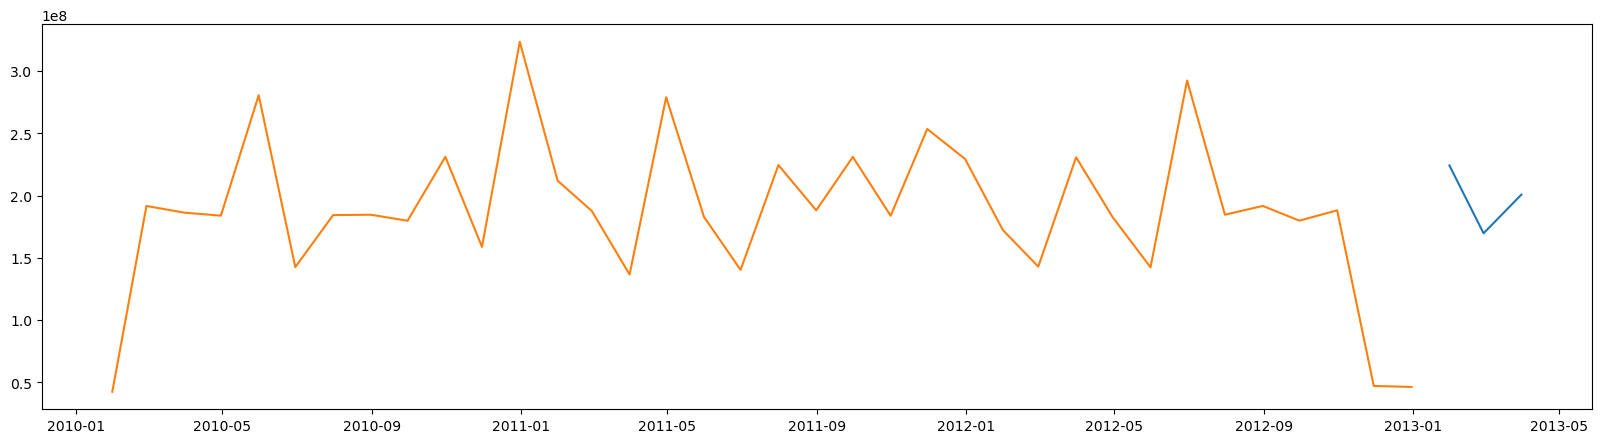

In [44]:
forecast = model.forecast(steps = 3)
plt.figure(figsize=(20,5))
plt.plot(forecast)
plt.plot(df_grouped)

<h1 style="font-family:Palatino;color:darkgreen;"> Using ML  </h1>

In [47]:
data1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [50]:
data1.drop('Date',axis=1,inplace = True)

<h1 style="font-family:Palatino;color:darkgreen;"> Train Test Split  </h1>

In [93]:
data1.drop(['Date', 'Day'], axis=1, inplace=True)

In [94]:
X=data1.drop('Weekly_Sales',axis=1)
y=data1.Weekly_Sales
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=15)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5148, 8), (1287, 8), (5148,), (1287,))

<h1 style="font-family:Palatino;color:darkgreen;"> Model Building  </h1>

In [106]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold

#boosting
from xgboost import XGBRegressor

models = [DecisionTreeRegressor(), 
          RandomForestRegressor(),
          KNeighborsRegressor(),
          XGBRegressor(),   
         ]

results = []
names = []
kfold = KFold(n_splits=10, shuffle=True, random_state=15)

for model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(type(model).__name__)
    print(f'{type(model).__name__} - R^2: {np.mean(cv_results):.3f} ({np.std(cv_results):.3f})')


DecisionTreeRegressor - R^2: 0.889 (0.018)
RandomForestRegressor - R^2: 0.932 (0.013)
KNeighborsRegressor - R^2: 0.601 (0.037)
XGBRegressor - R^2: 0.961 (0.008)


`XGBRegressor` model has the highest R-squared value `(0.961)` among the models tested, indicating that it may be the best model for predicting the target variable.

In [114]:
from sklearn.model_selection import RandomizedSearchCV

model = XGBRegressor()

params = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000]
}

search = RandomizedSearchCV(model, params, cv=5, scoring='r2', n_iter=10)
search.fit(X_train, y_train)

print(search.best_params_)
print(search.best_score_)

{'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1}
0.9598987591313266


In [116]:
model = XGBRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [118]:
y_pred=model.predict(X_test)

In [119]:
from sklearn import metrics
print(f"Mean Abslote Error : {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error : {metrics.mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error : {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")
print(f"R^2 : {metrics.r2_score(y_test,y_pred)}")

Mean Abslote Error : 59669.78232808857
Mean Squared Error : 8676385419.45442
Root Mean Squared Error : 93147.11707537931
R^2 : 0.9713608420831652


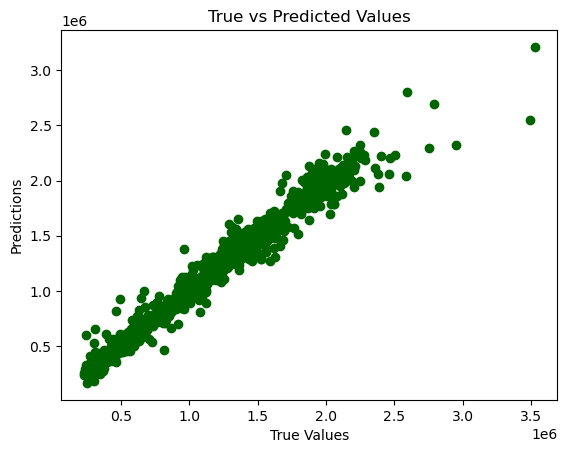

In [122]:
plt.scatter(y_test, y_pred,c='darkgreen')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()